In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95

In [3]:
df = pd.read_csv('../kruschke_data/FruitflyDataReduced.csv', dtype={'CompanionNumber':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Longevity        125 non-null    int64   
 1   CompanionNumber  125 non-null    category
 2   Thorax           125 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 2.4 KB


In [4]:
df.groupby('CompanionNumber').head(2)

,Longevity,CompanionNumber,Thorax
0,35,Pregnant8,0.64
1,37,Pregnant8,0.68
25,40,None0,0.64
26,37,None0,0.70
50,46,Pregnant1,0.64
51,42,Pregnant1,0.68
75,21,Virgin1,0.68
76,40,Virgin1,0.68
100,16,Virgin8,0.64
101,19,Virgin8,0.64


In [5]:
# Count the number of records per nominal group
df.CompanionNumber.value_counts()


None0        25
Pregnant1    25
Pregnant8    25
Virgin1      25
Virgin8      25
Name: CompanionNumber, dtype: int64

In [6]:
x = df.CompanionNumber
y = df.Longevity
mu_y = y.mean()
sigma_y = y.std()

In [7]:
model, idata = bst.metric_outcome_one_nominal_predictor(x, y, mu_y, sigma_y, n_draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_a, a0, a, sigma_y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.
The acceptance probability does not match the target. It is 0.9139, but should be close to 0.8. Try to increase the number of tuning steps.


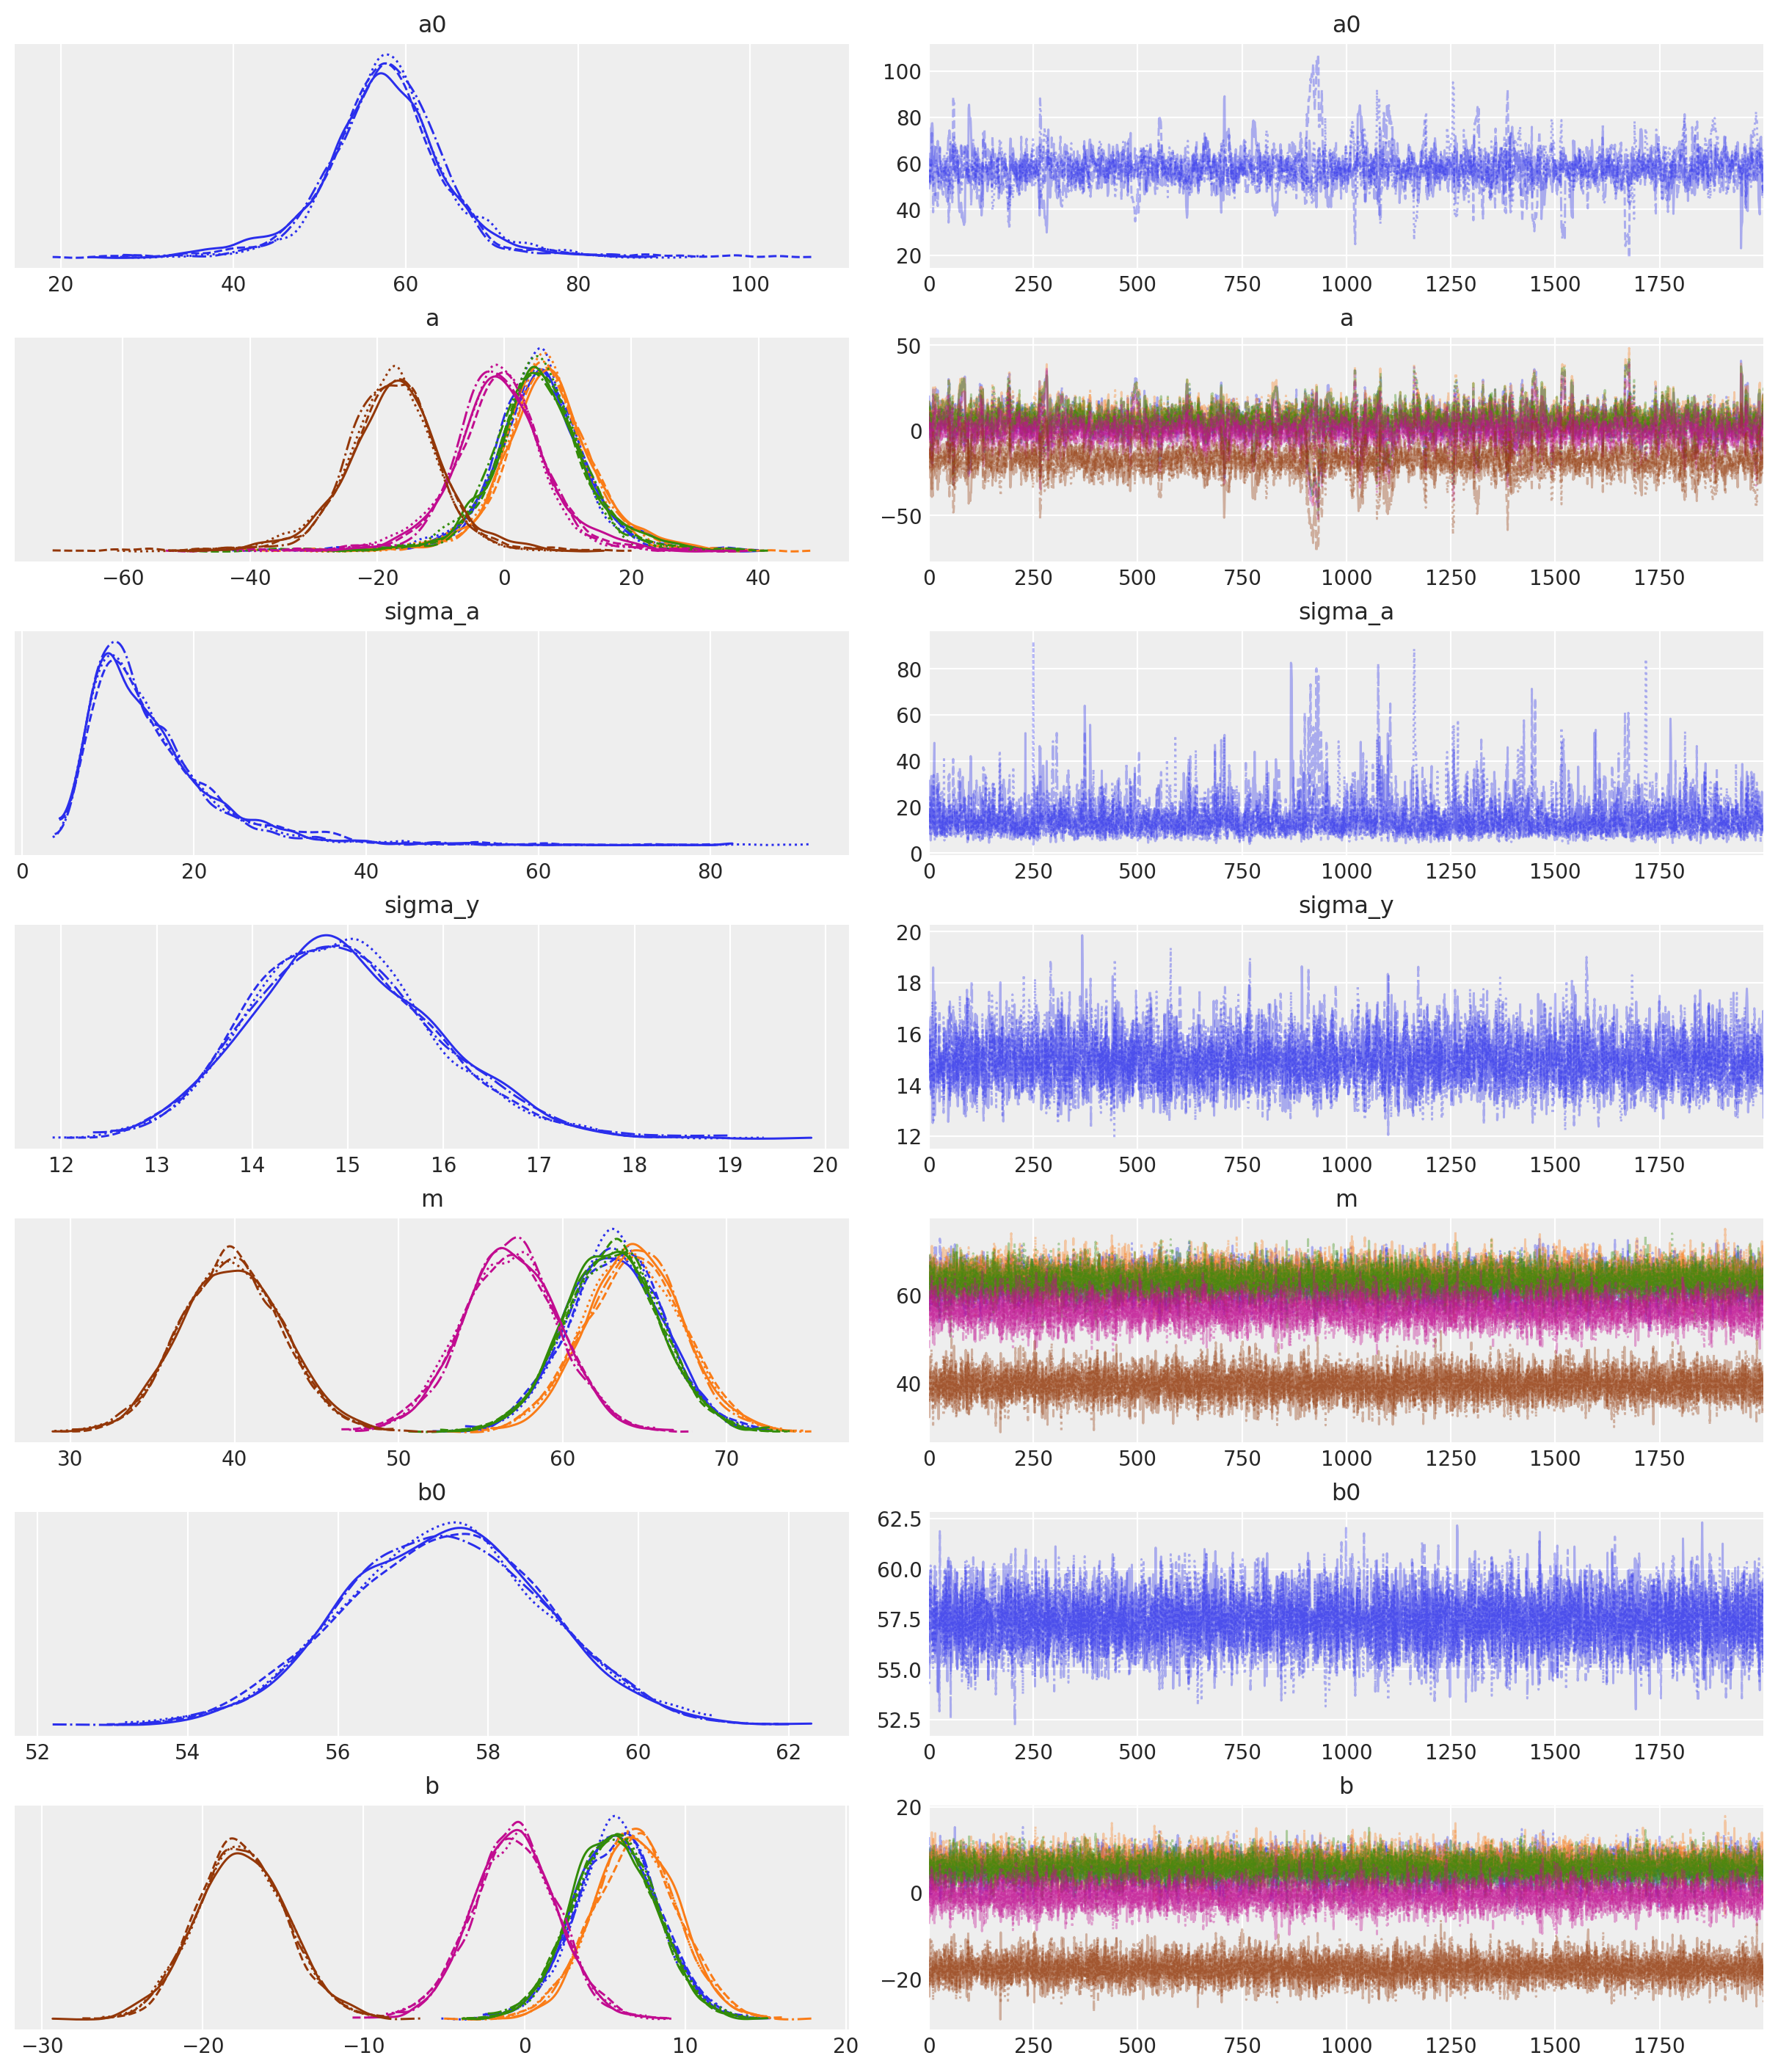

In [8]:
az.plot_trace(idata);